In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import json

In [2]:
def resize(mask, height, width):
    # Resize the array to match the height of the target shape (1280, 720)
    resized_array = cv2.resize(mask, (width, height), interpolation=cv2.INTER_LINEAR)
    return resized_array

In [3]:
def load_model(model_name):
    compiled_model = YOLO(f'./{model_name}')
    H, W = 720, 1280
    return compiled_model, H, W

In [4]:
def preprocess(frame, H, W):
    """
    Preprocess the frame for yolov8 model.
    """
    image_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    resized_image = cv2.resize(image_bgr, (W, H))
    return resized_image

In [5]:
def postprocess(results):
    """
    Postprocess the frame for yolov8 model.
    """
    for r in results:
        im_array = r.plot(probs=False,conf=False, boxes=False)  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image

In [8]:
def segment(img_file_path, model_name, alpha = 0.3):
    try:
        compiled_model, H, W = load_model(model_name)
        img = cv2.imread(img_file_path)
        
        # Preprocess the frame
        height, width, _ = img.shape
        input_image = preprocess(img, H, W)

        # Perform inference
        results = compiled_model(input_image)

        # Post-processing steps here...
        output_image = postprocess(results)
        # save the output_image with cv2
        cv2.imwrite("output.png", output_image)

        body = {
            "message": "Image segmented!",
        }

        response = {
            "statusCode": 200,
            "body": json.dumps(body)
        }

        return response

    except Exception as e:
        error_message = f"Error : {str(e)}"
        response = {
            "statusCode": 500,
            "body": json.dumps({"error": error_message})
        }
        return response

In [11]:
response = segment('./test2.png', 'models/best.pt')
print(response)


0: 384x640 (no detections), 338.8ms
Speed: 13.2ms preprocess, 338.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
{'statusCode': 500, 'body': '{"error": "Error : OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function \'imwrite\'\\n"}'}


In [12]:
model_name = 'models/best.pt'
img_file_path = './data/test2.png'
alpha = 0.3

In [13]:
compiled_model, H, W = load_model(model_name)
img = cv2.imread(img_file_path)

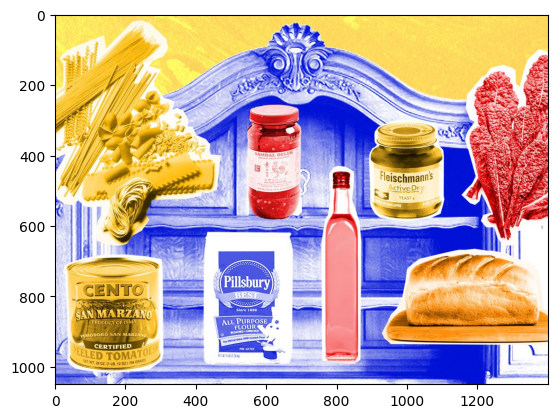

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))